# Time delay function for a singular potential

What happens if we choose a different kind of lens, e.g. one with a singular lensing potential? We can check this out by removing the core in our previous example (see Lecture 5). In this case, the lensing potential is

$$\hat\Psi \propto |\theta|$$

and the shape of the time delay function becomes:

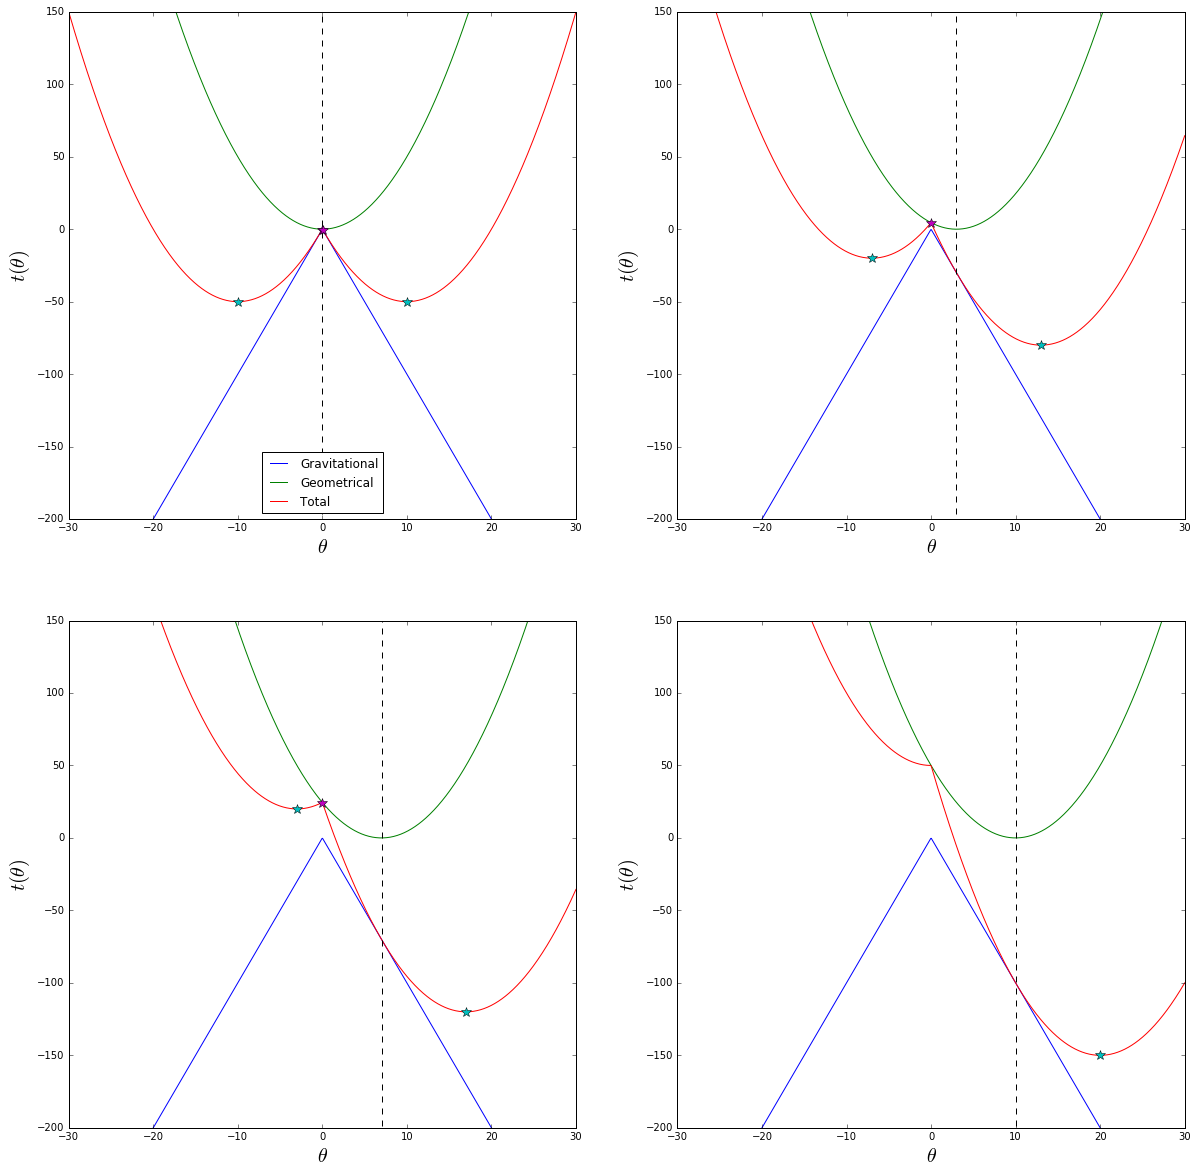

In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta=np.linspace(-30.0,30.0,1000)

def t_grav_func(theta,theta_c=1.0):
    # the lensing potential of a singular-isothermal-sphere
    return -np.sqrt(theta*theta+theta_c*theta_c)*10

theta_c=0.0
t_grav=t_grav_func(theta,theta_c)


def t_geom_func(theta,beta):
    # the geometrical time-delay
    return 0.5*(theta-beta)**2

# the position of the source
beta=[0,3,7,10]

# plot results
%matplotlib inline
fig,ax=plt.subplots(2,2,figsize=(20,20))
for i in range(len(beta)):
    ix=int(i/2)
    iy=i-ix*2
    
    # compute the time-delay as  a function of \theta
    t_geom=t_geom_func(theta,beta[i])

    t_total=t_grav+t_geom

    ax[ix,iy].plot(theta,t_grav,label='Gravitational')
    ax[ix,iy].plot(theta,t_geom,label='Geometrical')
    ax[ix,iy].plot(theta,t_total,label='Total')
    ax[ix,iy].set_xlim([-30,30])
    ax[ix,iy].set_ylim([-200,150])
    x=[beta[i],beta[i]]
    y=[-1500,1000]
    ax[ix,iy].plot(x,y,'--',color='black')
    if (ix == 0 and iy ==0):
        ax[ix,iy].legend(loc='best')

    # find local minima and maxima of the function and mark their positions on the curve 
    i_min= (np.diff(np.sign(np.diff(t_total))) > 0).nonzero()[0] + 1 # local min
    i_max= (np.diff(np.sign(np.diff(t_total))) < 0).nonzero()[0] + 1 # local max
    ax[ix,iy].plot(theta[i_min],t_total[i_min],'*',markersize=10)
    ax[ix,iy].plot(theta[i_max],t_total[i_max],'*',markersize=10)
    ax[ix,iy].set_xlabel(r'$\theta$',fontsize=20)
    ax[ix,iy].set_ylabel(r'$t(\theta)$',fontsize=20)

In this case, we see that the singularity at $\theta=0$ makes the time delay function non-continuosly deformable. The maximum of $t(\theta)$ remains fixed, and while one of the minima follows the source as before, the other one moves towards the center of the lens, until it disappears. Note that the image at $\theta=0$ has $\mu=0$, because the curvature of $t$ at its position is infinite. This image is indeed unphysical: we will see that it is not a solution of the lens equation.

Another singular potential is that of the point mass. In this case, the potential is 
$$
\hat\Psi \propto \ln |\theta| \;.
$$
Using this form of the potential, the figures change as follows:

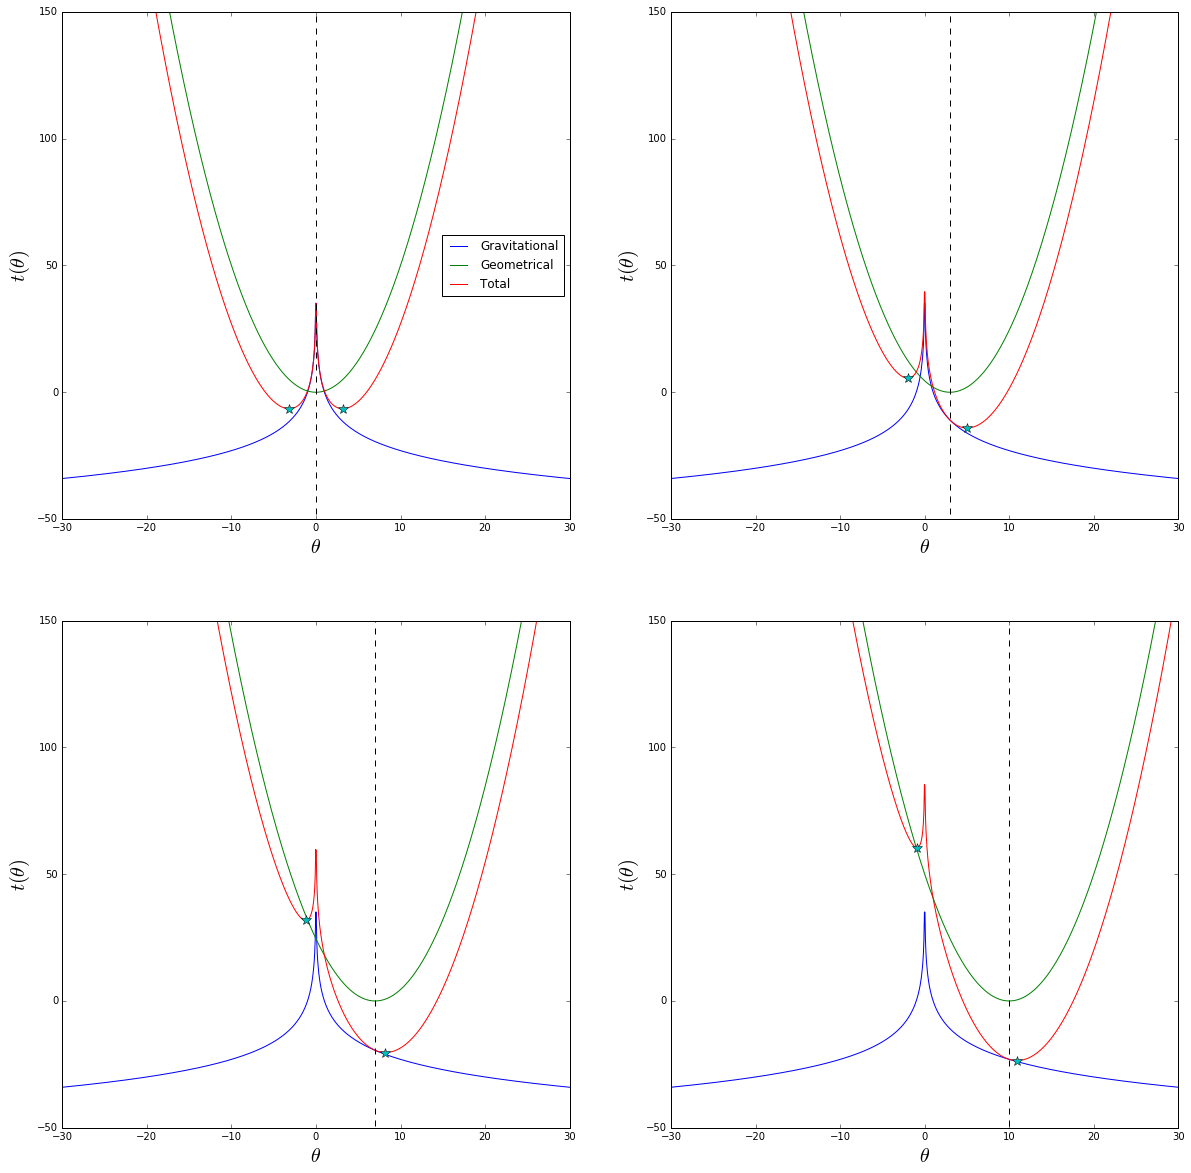

In [3]:
import numpy as np
import matplotlib.pyplot as plt

theta=np.linspace(-30.0,30.0,1000)

def t_grav_func(theta,theta_c=1.0):
    # the lensing potential of a point mass
    return -np.log(np.abs(theta))*10

theta_c=0.0
t_grav=t_grav_func(theta,theta_c)


def t_geom_func(theta,beta):
    # the geometrical time-delay
    return 0.5*(theta-beta)**2

# the position of the source
beta=[0,3,7,10]

# plot results
%matplotlib inline
fig,ax=plt.subplots(2,2,figsize=(20,20))
for i in range(len(beta)):
    ix=int(i/2)
    iy=i-ix*2
    
    # compute the time-delay as  a function of \theta
    t_geom=t_geom_func(theta,beta[i])

    t_total=t_grav+t_geom

    ax[ix,iy].plot(theta,t_grav,label='Gravitational')
    ax[ix,iy].plot(theta,t_geom,label='Geometrical')
    ax[ix,iy].plot(theta,t_total,label='Total')
    ax[ix,iy].set_xlim([-30,30])
    ax[ix,iy].set_ylim([-50,150])
    x=[beta[i],beta[i]]
    y=[-1500,1000]
    ax[ix,iy].plot(x,y,'--',color='black')
    if (ix == 0 and iy ==0):
        ax[ix,iy].legend(loc='best')

    # find local minima and maxima of the function and mark their positions on the curve 
    i_min= (np.diff(np.sign(np.diff(t_total))) > 0).nonzero()[0] + 1 # local min
    i_max= (np.diff(np.sign(np.diff(t_total))) < 0).nonzero()[0] + 1 # local max
    ax[ix,iy].plot(theta[i_min],t_total[i_min],'*',markersize=10)
    #ax[ix,iy].plot(theta[i_max],t_total[i_max],'*',markersize=10)
    ax[ix,iy].set_xlabel(r'$\theta$',fontsize=20)
    ax[ix,iy].set_ylabel(r'$t(\theta)$',fontsize=20)

Notice that the divergence of $\hat\Psi$ for $\theta \rightarrow 0$ implies that there is no central image in this case. Moreover, the minimum of $t$ on the opposide side to the lens with respect to the source approaches the center of the lens but never disappears. Its magnification vanishes, though. Thus, this image is extremely demagnified.

# Time delay *surface*

Now that we understood the problem in one dimension, we can move on and consider a two-dimensional case. In particular, we consider now the potential of an axially symmetric lens. Again, we will move the source relative to the lens to see how the time-delay surface  is modified.

(-70.498207472472785, 50)

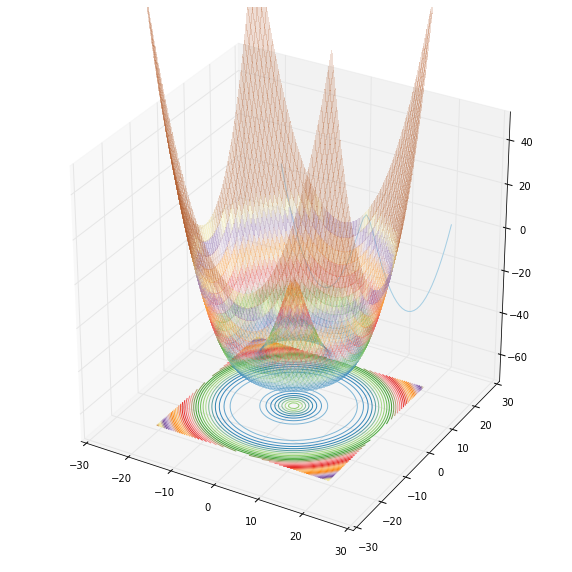

In [4]:
# the time delay surface

def t_grav_surf(size, npix=500, theta_c = 1.0, center=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = npix / 2
    else:
        x0 = center[0]/pixel
        y0 = center[1]/pixel

    return -np.sqrt((x-x0)*(x-x0)*pixel*pixel+(y-y0)*(y-y0)*pixel*pixel+theta_c*theta_c)*10

# the geometrical time delay
def t_geom_surf(size, npix=500, beta=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)*pixel
    y = x[:,np.newaxis]

    
    if beta is None:
        x0 = y0 = npix / 2*pixel
    else:
        x0 = beta[0]+npix/2*pixel
        y0 = beta[1]+npix/2*pixel

    return 0.5*((x-x0)*(x-x0)+(y-y0)*(y-y0))


# the position of the source is now defined by the vector beta_
beta=0.0
beta_=[beta,0.0]

# setting up the mesh to compute the surfaces
npix=60.0
size=40.0


t_grav_surf=t_grav_surf(size,npix=npix)
t_geom_surf=t_geom_surf(size,npix=npix,beta=beta_)


from matplotlib import cm
import pylab

plt.ion()


#THIS SHOULD BE UN-COMMENTED FOR INTERACTIVE DISPLAY
#%matplotlib notebook   

#THIS SHOULD BE COMMENTED FOR INTERACTIVE DISPLAY
%matplotlib inline     


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

xa=np.arange(-npix/2, npix/2, 1)
ya=np.arange(-npix/2, npix/2, 1)



# I will show the contours levels projected in the x-y plane
levels=np.linspace(np.amin(t_geom_surf+t_grav_surf),np.amax(t_geom_surf+t_grav_surf),40)


pixel_size=size/(npix-1)
X, Y = np.meshgrid(xa*pixel_size, ya*pixel_size)
ax.plot_surface(X,Y,t_geom_surf+t_grav_surf,vmax=5,rstride=1, cstride=1, cmap=plt.get_cmap('Paired'),
                       linewidth=0, antialiased=False,alpha=0.2)

cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='z', offset=np.amin(t_geom_surf+t_grav_surf)-20.0, cmap=plt.get_cmap('Paired'),levels=levels)
#cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='x', offset=-30, cmap=plt.get_cmap('Paired'),levels=[0])
cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='y', offset=30, cmap=plt.get_cmap('Paired'),levels=[0])
ax.set_xlim3d(-30, 30)
ax.set_ylim3d(-30, 30)
ax.set_zlim3d(np.amin(t_geom_surf+t_grav_surf)-20.0, 50)
#plt.show()

Let's try to move the source by 3 arcsec:

(-100.38053661887045, 50)

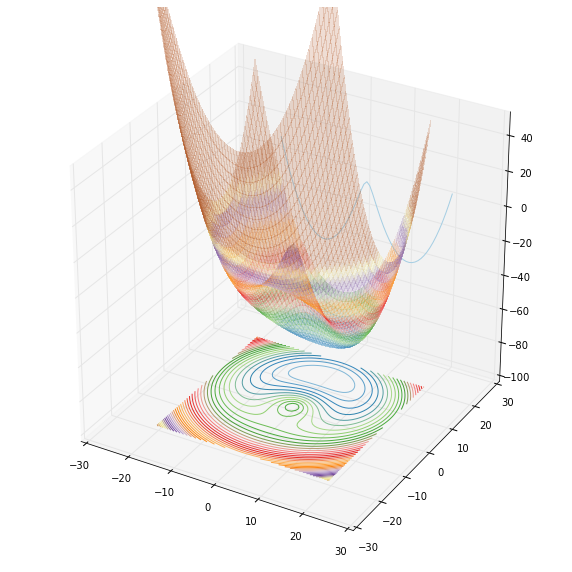

In [5]:
# the time delay surface

def t_grav_surf(size, npix=500, theta_c = 1.0, center=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = npix / 2
    else:
        x0 = center[0]/pixel
        y0 = center[1]/pixel

    return -np.sqrt((x-x0)*(x-x0)*pixel*pixel+(y-y0)*(y-y0)*pixel*pixel+theta_c*theta_c)*10

# the geometrical time delay
def t_geom_surf(size, npix=500, beta=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)*pixel
    y = x[:,np.newaxis]

    
    if beta is None:
        x0 = y0 = npix / 2*pixel
    else:
        x0 = beta[0]+npix/2*pixel
        y0 = beta[1]+npix/2*pixel

    return 0.5*((x-x0)*(x-x0)+(y-y0)*(y-y0))


# the position of the source is now defined by the vector beta_
beta=3.0
beta_=[0.0,beta]

# setting up the mesh to compute the surfaces
npix=60.0
size=40.0


t_grav_surf=t_grav_surf(size,npix=npix)
t_geom_surf=t_geom_surf(size,npix=npix,beta=beta_)


from matplotlib import cm
import pylab

plt.ion()

#THIS SHOULD BE UN-COMMENTED FOR INTERACTIVE DISPLAY
#%matplotlib notebook   

#THIS SHOULD BE COMMENTED FOR INTERACTIVE DISPLAY
%matplotlib inline     



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

xa=np.arange(-npix/2, npix/2, 1)
ya=np.arange(-npix/2, npix/2, 1)



# I will show the contours levels projected in the x-y plane
levels=np.linspace(np.amin(t_geom_surf+t_grav_surf),np.amax(t_geom_surf+t_grav_surf),40)


pixel_size=size/(npix-1)
X, Y = np.meshgrid(xa*pixel_size, ya*pixel_size)
ax.plot_surface(X,Y,t_geom_surf+t_grav_surf,vmax=5,rstride=1, cstride=1, cmap=plt.get_cmap('Paired'),
                       linewidth=0, antialiased=False,alpha=0.2)

cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='z', offset=np.amin(t_geom_surf+t_grav_surf)-20.0, cmap=plt.get_cmap('Paired'),levels=levels)
#cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='x', offset=-30, cmap=plt.get_cmap('Paired'),levels=[0])
cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='y', offset=30, cmap=plt.get_cmap('Paired'),levels=[0])
ax.set_xlim3d(-30, 30)
ax.set_ylim3d(-30, 30)
ax.set_zlim3d(np.amin(t_geom_surf+t_grav_surf)-20.0, 50)

Notice that the ring splits into a minimum (which moves away from the lens center following the source) and a saddle point. The height difference between the saddle and the maximum decreases as the source moves away. The radial curvature in between the maximum and the saddle also decreases, indicating the magnification is increasing in the radial direction.

The next step is to further move the source away. Let's move it at a distance of 7 arcsec from the lens:

<IPython.core.display.Javascript object>


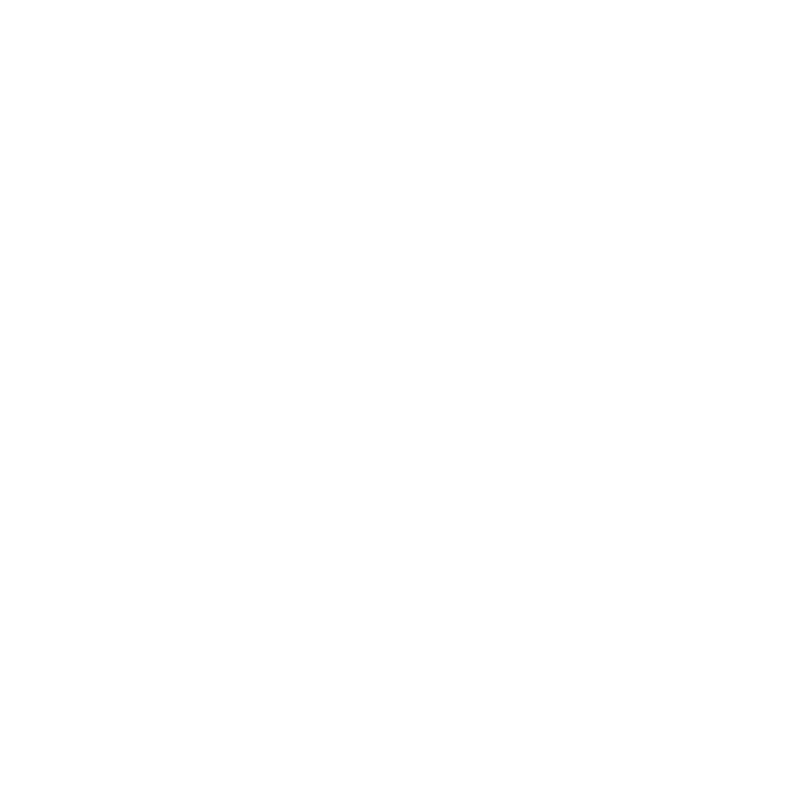

(-100.38053661887045, 50)

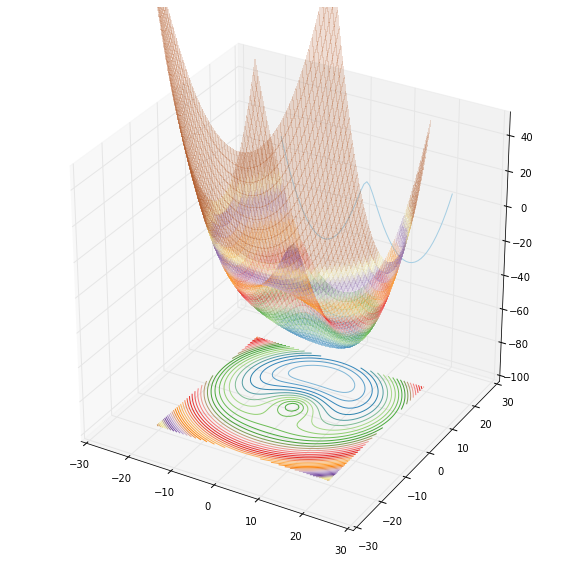

In [13]:
# the time delay surface

def t_grav_surf(size, npix=500, theta_c = 1.0, center=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = npix / 2
    else:
        x0 = center[0]/pixel
        y0 = center[1]/pixel

    return -np.sqrt((x-x0)*(x-x0)*pixel*pixel+(y-y0)*(y-y0)*pixel*pixel+theta_c*theta_c)*10

# the geometrical time delay
def t_geom_surf(size, npix=500, beta=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)*pixel
    y = x[:,np.newaxis]

    
    if beta is None:
        x0 = y0 = npix / 2*pixel
    else:
        x0 = beta[0]+npix/2*pixel
        y0 = beta[1]+npix/2*pixel

    return 0.5*((x-x0)*(x-x0)+(y-y0)*(y-y0))


# the position of the source is now defined by the vector beta_
beta=3.0
beta_=[beta,0.0]

# setting up the mesh to compute the surfaces
npix=60.0
size=40.0


t_grav_surf=t_grav_surf(size,npix=npix)
t_geom_surf=t_geom_surf(size,npix=npix,beta=beta_)


from matplotlib import cm
import pylab

plt.ion()

#THIS SHOULD BE UN-COMMENTED FOR INTERACTIVE DISPLAY
#%matplotlib notebook   

#THIS SHOULD BE COMMENTED FOR INTERACTIVE DISPLAY
%matplotlib inline     



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

xa=np.arange(-npix/2, npix/2, 1)
ya=np.arange(-npix/2, npix/2, 1)



# I will show the contours levels projected in the x-y plane
levels=np.linspace(np.amin(t_geom_surf+t_grav_surf),np.amax(t_geom_surf+t_grav_surf),40)


pixel_size=size/(npix-1)
X, Y = np.meshgrid(xa*pixel_size, ya*pixel_size)
ax.plot_surface(X,Y,t_geom_surf+t_grav_surf,vmax=5,rstride=1, cstride=1, cmap=plt.get_cmap('Paired'),
                       linewidth=0, antialiased=False,alpha=0.2)

cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='z', offset=np.amin(t_geom_surf+t_grav_surf)-20.0, cmap=plt.get_cmap('Paired'),levels=levels)
#cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='x', offset=-30, cmap=plt.get_cmap('Paired'),levels=[0])
cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='y', offset=30, cmap=plt.get_cmap('Paired'),levels=[0])
ax.set_xlim3d(-30, 30)
ax.set_ylim3d(-30, 30)
ax.set_zlim3d(np.amin(t_geom_surf+t_grav_surf)-20.0, 50)

In this case, the maximum and the saddle approach each other and disappear. The curvature of the time-delay surface where this happens is zero: we have reached an infinite magnification, meaning that the two images have merged on the radial critical line!

Now we modify the potential such to make it elliptical! To do that, we sustitute 
$$|\theta| \rightarrow \sqrt{\frac{\theta_1^2}{1-\epsilon}+\theta_2^2(1-\epsilon)}$$
where $\epsilon$ is the lens ellipticity.

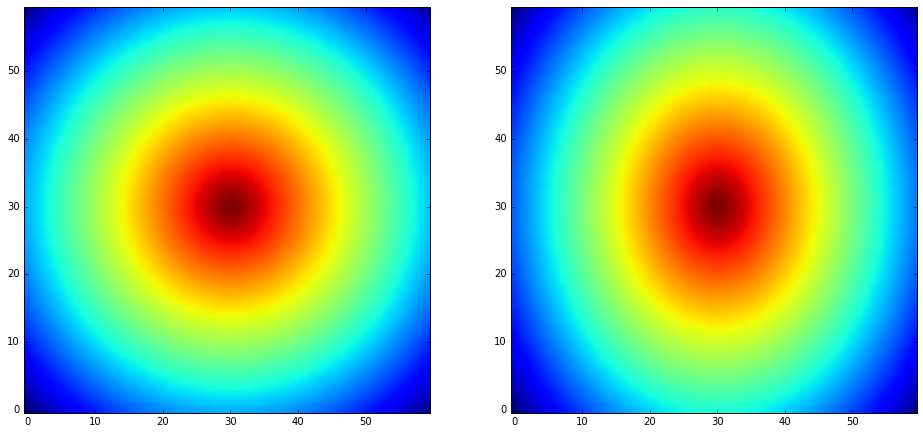

In [14]:
def t_grav_surf_ell(size, npix=500, theta_c = 1.0, center=None, ell=0.0):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = npix / 2
    else:
        x0 = center[0]/pixel
        y0 = center[1]/pixel

    return -np.sqrt(((x-x0)*pixel)**2/(1-ell)+((y-y0)*pixel)**2*(1-ell)+theta_c*theta_c)*10

beta=0.0
beta_=[0,beta]

# setting up the mesh to compute the surfaces
npix=60.0
size=40.0

%matplotlib inline

t_grav_surf0=t_grav_surf_ell(size,npix=npix,ell=0.0,theta_c=1.0)
t_grav_surf=t_grav_surf_ell(size,npix=npix,ell=0.2,theta_c=1.0)


fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].imshow(t_grav_surf0,origin='lower')
ax[1].imshow(t_grav_surf,origin='lower')

This shows that the iso-potentials are stretched along the y-axis.

<IPython.core.display.Javascript object>


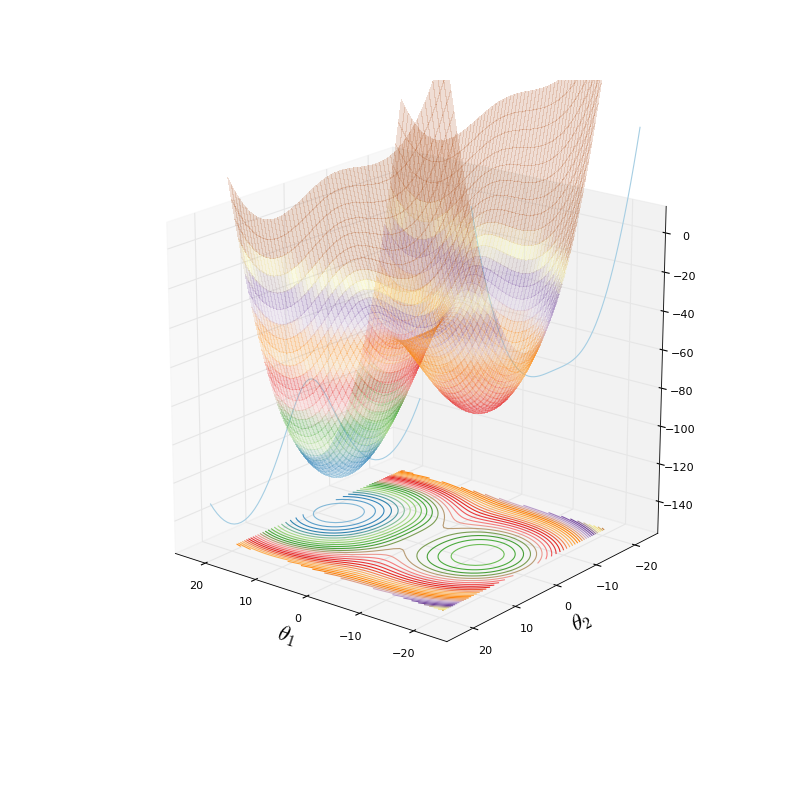

In [25]:
def t_grav_surf_ell(size, npix=500, theta_c = 1.0, center=None, ell=0.0):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = npix / 2
    else:
        x0 = center[0]/pixel
        y0 = center[1]/pixel

    return -np.sqrt(((x-x0)*pixel)**2/(1-ell)+((y-y0)*pixel)**2*(1-ell)+theta_c*theta_c)*10

# the geometrical time delay
def t_geom_surf(size, npix=500, beta=None):

    pixel=size/(npix-1)
    
    x = np.arange(0, npix, 1, float)*pixel
    y = x[:,np.newaxis]

    
    if beta is None:
        x0 = y0 = npix / 2*pixel
    else:
        x0 = beta[0]+npix/2*pixel
        y0 = beta[1]+npix/2*pixel

    return 0.5*((x-x0)*(x-x0)+(y-y0)*(y-y0))



# the position of the source is now defined by the vector beta_
beta=2.0
beta_=[beta,0]

# setting up the mesh to compute the surfaces
npix=60.0
size=40.0


t_grav_surf=t_grav_surf_ell(size,npix=npix,ell=0.5,theta_c=5.0)
t_geom_surf=t_geom_surf(size,npix=npix,beta=beta_)

from matplotlib import cm
import pylab
plt.ion()

#THIS SHOULD BE UN-COMMENTED FOR INTERACTIVE DISPLAY
%matplotlib notebook   

#THIS SHOULD BE COMMENTED FOR INTERACTIVE DISPLAY
#%matplotlib inline     



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

xa=np.arange(-npix/2, npix/2, 1)
ya=np.arange(-npix/2, npix/2, 1)



# I will show the contours levels projected in the x-y plane
levels=np.linspace(np.amin(t_geom_surf+t_grav_surf),np.amax(t_geom_surf+t_grav_surf),40)

minx=-25
maxx=-minx

miny=-25
maxy=-miny


pixel_size=size/(npix-1)
X, Y = np.meshgrid(xa*pixel_size, ya*pixel_size)
ax.plot_surface(X,Y,t_geom_surf+t_grav_surf,vmax=2,rstride=1, cstride=1, cmap=plt.get_cmap('Paired'),
                       linewidth=0, antialiased=False,alpha=0.2)

cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='z', offset=np.amin(t_geom_surf+t_grav_surf)-20.0, cmap=plt.get_cmap('Paired'),levels=levels)
cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='x', offset=minx, cmap=plt.get_cmap('Paired'),levels=[0])
cset = ax.contour(X, Y, t_geom_surf+t_grav_surf, zdir='y', offset=maxy, cmap=plt.get_cmap('Paired'),levels=[0])
ax.set_xlim3d(minx, maxx)
ax.set_ylim3d(miny, maxy)
ax.set_zlim3d(np.amin(t_geom_surf+t_grav_surf)-20.0, 10)
ax.set_xlabel(r'$\theta_1$',fontsize=20)
ax.set_ylabel(r'$\theta_2$',fontsize=20)

plt.show()

As you can see, breaking the axial symmetry increases the number of multiple images that can form out of a source. Play with $\beta$ to move the source along the two symmetry axes and then along arbitrary directions to understand what kind of image configurations become possible!